In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import pandas as pd
from seminartools.data import read_inflation
from seminartools.models.uc_sv_ss_model import UCSVSSModel

# 1. Read data

In [21]:
df_inflation = read_inflation()
df_inflation

,Country Code,IMF Country Code,Country,yearmonth,inflation
23311,PRT,182,Portugal,1970-04-01,0.000000
21697,NZL,196,New Zealand,1970-04-01,0.015421
7708,DOM,243,Dominican Republic,1970-04-01,-0.001604
9062,FIN,172,Finland,1970-04-01,0.008333
13232,IRL,178,Ireland,1970-04-01,0.029871
...,...,...,...,...,...
4821,CAN,156,Canada,2023-01-01,0.006080
26740,SWE,144,Sweden,2023-01-01,0.014955
16098,KOR,542,"Korea, Rep.",2023-01-01,0.010538
10308,GBR,112,United Kingdom,2023-01-01,0.008814


# 2. AR model per country

In [22]:
model = UCSVSSModel(num_particles = 5000, stochastic_seasonality=True)
model

In [23]:
df_inflation

,Country Code,IMF Country Code,Country,yearmonth,inflation
23311,PRT,182,Portugal,1970-04-01,0.000000
21697,NZL,196,New Zealand,1970-04-01,0.015421
7708,DOM,243,Dominican Republic,1970-04-01,-0.001604
9062,FIN,172,Finland,1970-04-01,0.008333
13232,IRL,178,Ireland,1970-04-01,0.029871
...,...,...,...,...,...
4821,CAN,156,Canada,2023-01-01,0.006080
26740,SWE,144,Sweden,2023-01-01,0.014955
16098,KOR,542,"Korea, Rep.",2023-01-01,0.010538
10308,GBR,112,United Kingdom,2023-01-01,0.008814


In [24]:
df_inflation.pivot(
    index = "yearmonth",
    columns = "Country",
    values = "inflation"
)

Country,Australia,Austria,Belgium,Canada,Cyprus,Denmark,Dominican Republic,Fiji,Finland,France,...,Portugal,Singapore,South Africa,Spain,Sweden,Switzerland,Thailand,Turkey,United Kingdom,United States
yearmonth,,,,,,,,,,,,,,,,,,,,,
1970-04-01,0.011236,0.008889,0.005236,0.000000,0.004670,0.015152,-0.001604,0.003524,0.008333,0.006944,...,0.000000,-0.006706,0.058824,0.000000,0.015504,0.008982,-0.004678,0.012093,0.024390,0.016667
1970-07-01,0.011111,0.013216,0.010417,0.012500,0.021692,0.029851,-0.008031,0.007902,0.000000,0.013793,...,0.000000,0.008439,0.000000,0.042553,0.015267,0.011869,-0.000881,0.013470,0.011905,0.011216
1970-10-01,0.021978,0.008696,0.005155,-0.006173,0.006673,0.014493,0.016516,0.021777,0.008264,0.013605,...,0.058824,0.001674,0.000000,0.020408,0.015038,0.020528,-0.002352,0.041157,0.011765,0.013652
1971-01-01,0.010753,0.012931,0.010256,0.006211,0.008436,0.000000,-0.021344,0.027280,0.024590,0.013423,...,0.000000,0.016708,0.055556,0.020000,0.037037,0.020115,-0.000589,0.042001,0.034884,0.007576
1971-04-01,0.010638,0.008511,0.015228,0.012346,0.008366,0.021429,0.039714,0.004979,0.016000,0.013245,...,0.055556,-0.013147,0.000000,0.019608,0.000000,0.014085,-0.000295,0.049200,0.033708,0.010860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01,0.021295,0.020300,0.033275,0.020211,0.009326,0.021536,0.028900,0.034391,0.021415,0.014870,...,0.015094,0.016682,0.014892,0.020852,0.016158,0.007859,0.019048,0.282867,0.012270,0.022835
2022-04-01,0.017376,0.031142,0.016949,0.031008,0.049593,0.032997,0.022648,0.011465,0.025524,0.022894,...,0.050186,0.019820,0.023478,0.032860,0.032686,0.015595,0.023886,0.169374,0.036364,0.029738
2022-07-01,0.017933,0.026846,0.025000,0.008354,0.018325,0.023957,0.013293,0.007368,0.016000,0.011638,...,0.010619,0.019274,0.027957,0.012038,0.030796,0.006718,0.010083,0.088515,0.017544,0.013147


In [25]:
model.run_pf(df_inflation)

100%|██████████| 35/35 [00:00<00:00, 1233.12it/s]

# 3. Evaluation

In [8]:
df_inflation["Country"].unique()

array(['Portugal', 'New Zealand', 'Dominican Republic', 'Finland',
       'Ireland', 'Austria', 'Japan', 'South Africa', 'Korea, Rep.',
       'Fiji', 'Paraguay', 'Malaysia', 'Sweden', 'Switzerland',
       'Thailand', 'Cyprus', 'Mauritius', 'Greece', 'France', 'Denmark',
       'Netherlands', 'Turkey', 'Singapore', 'Germany', 'Luxembourg',
       'Guatemala', 'Norway', 'Belgium', 'United States', 'Canada',
       'Italy', 'United Kingdom', 'Australia', 'Spain', 'Philippines'],
      dtype=object)

# 4. H-period ahead forecasting

In [9]:
df_inflation

,Country Code,IMF Country Code,Country,yearmonth,inflation
23311,PRT,182,Portugal,1970-04-01,0.000000
21697,NZL,196,New Zealand,1970-04-01,0.015421
7708,DOM,243,Dominican Republic,1970-04-01,-0.001604
9062,FIN,172,Finland,1970-04-01,0.008333
13232,IRL,178,Ireland,1970-04-01,0.029871
...,...,...,...,...,...
4821,CAN,156,Canada,2023-01-01,0.006080
26740,SWE,144,Sweden,2023-01-01,0.014955
16098,KOR,542,"Korea, Rep.",2023-01-01,0.010538
10308,GBR,112,United Kingdom,2023-01-01,0.008814


In [10]:
model.predict(df_inflation.query("yearmonth <= '2022-10-1'"))

,inflation,Country,yearmonth
0,0.030041,Portugal,2023-01-01
1,0.007696,New Zealand,2023-01-01
2,0.016131,Dominican Republic,2023-01-01
3,0.021678,Finland,2023-01-01
4,0.009536,Ireland,2023-01-01
5,0.025192,Austria,2023-01-01
6,0.008112,Japan,2023-01-01
7,-0.002080,South Africa,2023-01-01
8,0.002093,"Korea, Rep.",2023-01-01
9,-0.003514,Fiji,2023-01-01


In [11]:
from seminartools.models.utils import h_period_ahead_forecast

forecast = h_period_ahead_forecast(model, df_inflation, "2010-01-01", h=1)
forecast

,inflation,Country,yearmonth
0,0.009589,Portugal,2010-01-01
1,-0.010948,New Zealand,2010-01-01
2,0.013829,Dominican Republic,2010-01-01
3,-0.003653,Finland,2010-01-01
4,-0.000817,Ireland,2010-01-01
...,...,...,...
1850,0.023352,Italy,2023-01-01
1851,0.026057,United Kingdom,2023-01-01
1852,0.017818,Australia,2023-01-01
1853,0.028554,Spain,2023-01-01


<Axes: xlabel='yearmonth'>

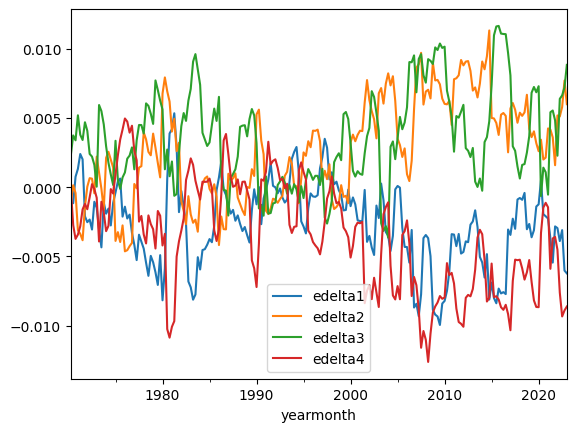

In [12]:
model.stored_state_means.loc["United States"][["edelta1", "edelta2", "edelta3", "edelta4"]].plot()

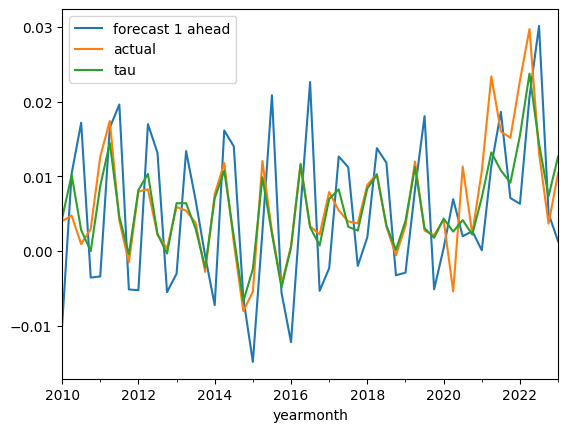

In [13]:
import matplotlib.pyplot as plt
forecast.query("Country == 'United States'").set_index("yearmonth")['inflation'].plot(label = "forecast 1 ahead")
df_inflation.query("Country == 'United States' and yearmonth >= '2010-01-01'").set_index("yearmonth")['inflation'].plot(label = "actual")
model.stored_state_means.loc["United States"].loc["2010-01-01":]["etau"].plot(label = "tau")
plt.legend()

<Axes: xlabel='quarter'>

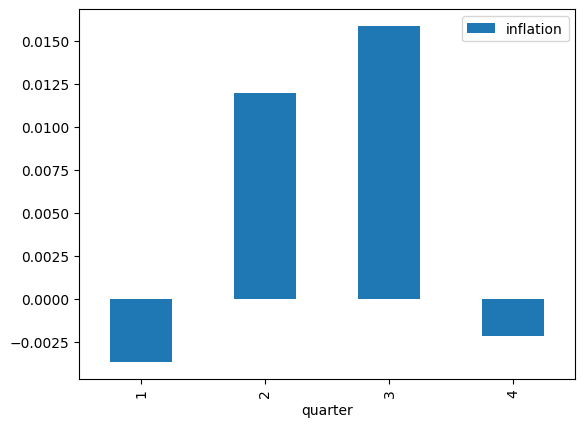

In [14]:
forecast.query("Country == 'United States'").set_index("yearmonth").assign(
    quarter = lambda x: x.index.quarter
)[["inflation", "quarter"]].groupby("quarter").mean().plot.bar()

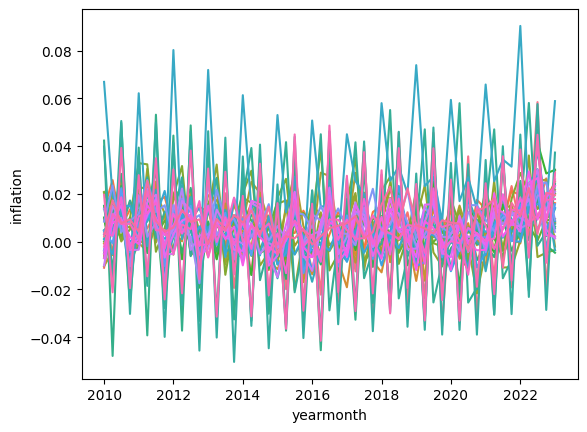

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(
    data = forecast,
    x = "yearmonth",
    y = "inflation",
    hue = "Country"
)
# turn off legend
plt.legend().remove()

# 5. Compare the forecast with the actual data

In [16]:
forecast_merged = forecast.copy().rename(columns={"inflation": "pred"})
forecast_merged = forecast_merged.merge(
    df_inflation[["Country", "yearmonth", "inflation"]],
    on=["Country", "yearmonth"],
    how="left",
).rename(columns={"inflation": "actual"})
forecast_merged.tail(100)

,pred,Country,yearmonth,actual
1755,0.028752,Austria,2022-07-01,0.026846
1756,0.005491,Japan,2022-07-01,0.010628
1757,0.025178,South Africa,2022-07-01,0.027957
1758,0.010685,"Korea, Rep.",2022-07-01,0.011352
1759,-0.006480,Fiji,2022-07-01,0.007368
...,...,...,...,...
1850,0.023352,Italy,2023-01-01,0.003938
1851,0.026057,United Kingdom,2023-01-01,0.008814
1852,0.017818,Australia,2023-01-01,0.013756
1853,0.028554,Spain,2023-01-01,0.006013


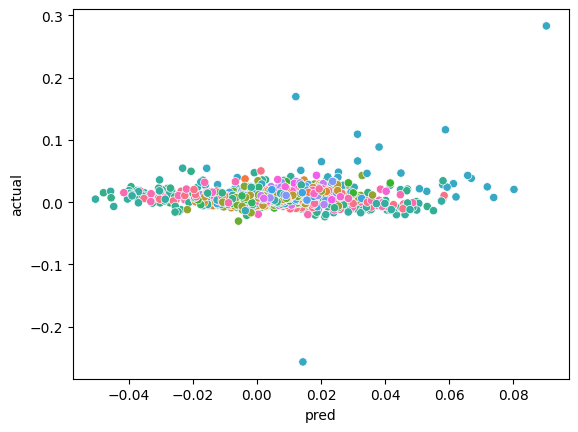

In [17]:
sns.scatterplot(
    data = forecast_merged,
    x = "pred",
    y = "actual",
    hue = "Country"
)
plt.legend().remove()

In [18]:
import statsmodels.api as sm

sm.OLS(
    forecast_merged["actual"], sm.add_constant(forecast_merged["pred"])
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 actual   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     15.50
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           8.56e-05
Time:                        18:25:46   Log-Likelihood:                 5262.9
No. Observations:                1855   AIC:                        -1.052e+04
Df Residuals:                    1853   BIC:                        -1.051e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0062      0.000     17.545      0.000       0.006       0.007
pred           0.0837      0.021      3.937      0.000       0.042       0.125
==============================================================================
Omnibus:                     1303.661   Durbin-Watson:                   1.742
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1643360.330
Skew:                           1.820   Prob(JB):                         0.00
Kurtosis:                     148.769   Cond. No.                         64.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""